**Object Detection and Segmentation for Fine-Grained Recognition**
**Using Convolutional Neural Networks in TensorFlow**

***Abstract-*** *This project addresses the problem of fine-grained recognition: recognizing subordinate categories for classifying images across 10 categories:airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.
Based on the insight that images with similar poses can be automatically discovered for fine-grained classes in the same domain. The appearance descriptors are learned using a deep learning using convolutional neural network. Our approach requires only image level class labels, without any use of part annotations or segmentation masks, which may be costly to obtain. TensorFlow is using as the tools for the efficient implementation. Detailed explenations are provided of implemetation including TensorBoard aspects.*  

[TOC]: #Table-of-Contents-Support

# Outline
-  1.Introduction
-  2.Background
 -  2.1.Neural Network
 -  2.2.convolutional neural networks
    -  Local receptive fields
    -  Shared weights and biases
    -  Pooling Layers
-  3.TensorFlow for the CIFAR-10 dataset
 -  3.1.Code Navigation
         -  3.1.1 Preprocess of the data
-  4.TensorBoard
 -  1.Python Code
-  5.Implimentation
 - Training
 - Evaluation


# 1. Introduction
**Neural Network** is well-suited to problem in which the training data corresponds to noisy, complex sensor data, such as input from cameras and microphones. In addition, it is applicable to problem for which more symbolic representations are often used. In general, it is appropriate for problems with the following charectristics:
- *Instances are represented by many attribute-value pairs.*  
- *The target function output may be descrete-valued, real-valued, or a vectored, or a vector of several real- or discrete- valued attributes.*  
- *The training examples may contain errors.*  
- *Fast evaluation of the learned target function may be required.*  
- *The ability of humans to understand the learned target function is not important.*  

**Deep learning** (deep structured learning, hierarchical learning or deep machine learning) based on set of algorithms attempts attempt to model high-level abstractions in data by using multiple processing layers, with complex structures or otherwise, composed of multiple non-linear transformations.  
  
Choossing Neural Network as an algorithm in deep learning often much harder to train; That's unfortunate, since we have good reason to believe that if we could train deep nets they'd be much more powerful. Furthermore, upon reflection, it's strange to use networks with fully-connected layers to classify images. The reason is that such a network architecture does not take into account the spatial structure of the images. For instance, it treats input pixels which are far apart and close together on exactly the same footing.  
  
**Convolution Neaural Network (CNN)** presents a special architecture which is particularly well-adapted to classify images. It was inspired by biological processes and is variations of multilayer perceptrons designed to use minimal amounts of preprocessing. Using this architecture makes convolutional networks fast to train. This, in turns, helps us train deep, many-layer networks for classifying images.
  
**TensorFlow** is used to accompolish the mathematical computation with a directed graph of nodes & edges:
- Nodes: typically implement mathematical operations, but can also represent endpoints to feed in data, push out results, or read/write persistent variables. 
- Edges: describe the input/output relationships between nodes. These data edges carry dynamically-sized multidimensional data arrays, or tensors.
This totorial can be consider as a frame work for implimenting a larger and more sophisticated models. The orgin of the Code is provided by http://www.tensorflow.org. The wirter manipulate the code based on the desire to implement the more complex convolutional networks, illustrating more details, and visualizing the ongoing process in the network architecture, training and evaluation

Two datasets are going to investigate in this network:  
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. http://www.cs.toronto.edu/%7Ekriz/cifar.html.
    
- Yahoo! Shopping Shoes Image Content, version 1.0. This dataset contains 107 folders, each corresponding to a type and brand of shoe. for instances: classes/aerosoles_sandals, classes/aetrex_sandals, ... . Each folder contains some number of images of shoes of the respective type and brand. All together 5357 images. This dataset should be polished to extract training images and test images. http://webscope.sandbox.yahoo.com.
    
The report is currently in beta. I welcome notification of typos, bugs, minor errors, and major misconceptions. Please drop me a line at Ali.Miraftab@utsa.edu if you spot such an error.

# 2. Background
## 2.1. Neural Network
We already know Neural Network is using networks in which adjacent network layers are fully connected to one another. That is, every neuron in the network is connected to every neuron in adjacent layers:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/ANN.png)

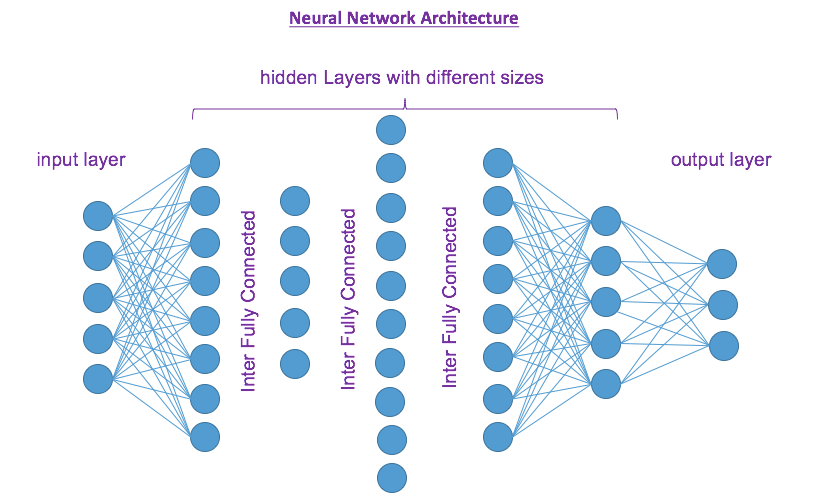

In [2]:
from IPython.display import Image, display
display(Image(filename='pic/ANN.png'))

In particular, for each pixel in the input image, we encoded the pixel's intensity as the value for a corresponding neuron in the input layer. As an instance, for the 640×480 pixel images we've been using, this means our network has 307200 input neurons. We then trained the network's weights and biases so that the network's output would - we hope! - correctly identify the input image.

## 2.2. convolutional neural networks
To implement fast and more intelligent multilayer nural network, the architecture on CNN use three basic ideas:
- local receptive fields, 
- shared weights, 
- and pooling.

### - Local receptive fields:
The window on the input pixels in the input image is called the local receptive field for the hidden neuron.  
It is shown the local receptive field being moved by one pixel at a time. In fact, sometimes a different length is used. **This movement step is called Stride.** Usually, it is set as one. However, different stride lengths can be investigate by using validation data for the best performance.  
And so on, building up the first hidden layer.

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/Local_Receptive.png)

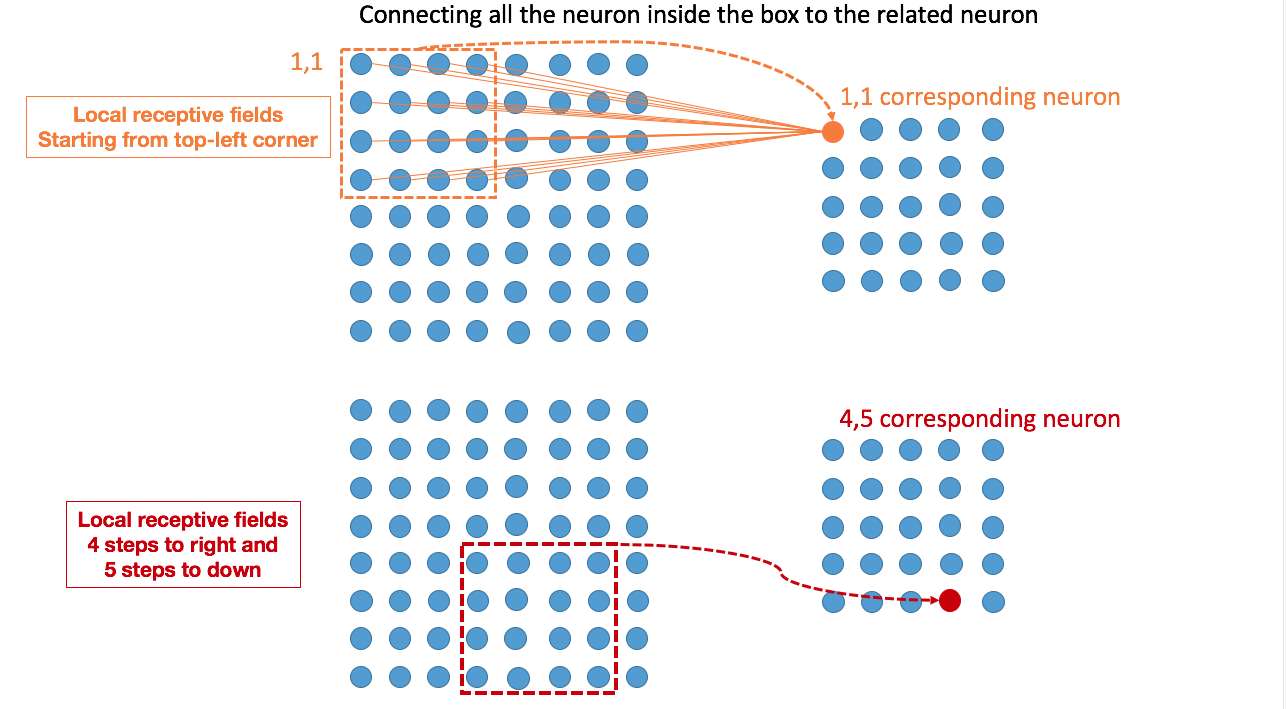

In [3]:
from IPython.display import Image, display
display(Image(filename='pic/Local_Receptive.png'))

### - Shared weights and biases:
Each hidden neuron has a bias and weights connected to its local receptive field. CNN uses the same weights and bias for each of the **Local receptive fields** and correspondly hidden neurons. In other words, for the j,k the hidden neuron, the output is:


$$\begin{eqnarray} 
  \sigma\left(b + \sum_{l=0}^x \sum_{m=0}^x  w_{l,m} a_{j+l, k+m} \right).
\tag{1}\end{eqnarray}$$

Here, σ is the neural activation function - perhaps the sigmoid function we used in earlier chapters. b is the shared value for the bias. $w_{l, m}$ is a $5×5$ array of shared weights. And, finally, we use $a_{x, y}$ to denote the input activation at position x,y.

This implies that all the neurons in the first hidden layer detect exactly the same feature. As a matter of fact, CNN are well adapted to the translation invariance of images: move a picture of a cat (say) a little ways, and it's still an image of a cat.  
For this reason, we sometimes call the map from the input layer to the hidden layer a feature map. We call the weights defining the feature map the shared weights. And we call the bias defining the feature map in this way the shared bias. The shared weights and bias are often said to define a kernel or filter. In the literature, people sometimes use these terms in slightly different ways.  
A big advantage of sharing weights and biases is that it greatly reduces the number of parameters involved in a convolutional network.

The network structure I've described so far can detect just a single kind of localized feature. To do image recognition we'll need more than one feature map. And so a complete convolutional layer consists of several different feature maps:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/Kernel.png)

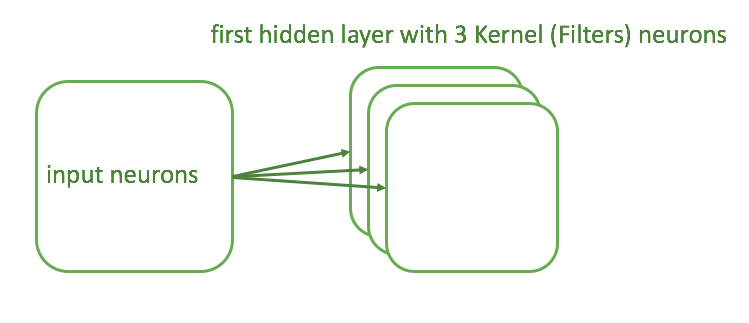

In [4]:
from IPython.display import Image, display
display(Image(filename='pic/Kernel.png'))

### - Pooling Layers:
In addition to the convolutional layers just described, convolutional neural networks also contain pooling layers. Pooling layers are usually used immediately after convolutional layers. What the pooling layers do is simplify the information in the output from the convolutional layer.

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/Pooling.png)

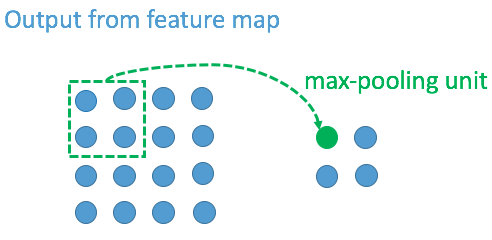

In [5]:
from IPython.display import Image, display
display(Image(filename='pic/Pooling.png'))

In detail, a pooling layer takes each feature map output from the convolutional layer and prepares a condensed feature map. For instance, each unit in the pooling layer may summarize a region of (say) 2×2 neurons in the previous layer.
- max-pooling
- L2 pooling

# 3. TensorFlow for the CIFAR-10 dataset
The proposed mode for CIFAR-10 by Alex Krizhevsky consists alternating convolutions and nonlinearities which is followed by fully connected layers and at the end softmax classifier. The implemented model by TensorFlow webpage consists of two CNN and two fully connected network layers with with a peak performance of about 86% accuracy within a few hours of training time on a GPU. Here it is tried to implement the three CNN layers and improve the performance. In parallel, the sophisticated framework for implementing CNN will be study in details. the majority of the materials can be found in the TensorFlow webpage. However, this report tries to put the explanations in a same place and modify the framework by it's own purpose.  
** Note:** The lack of GPU in the current machines causes spending much more time.


## 3.1. Code Navigation:

- ** Read the input : cifar10_input.py  **
    - inputs( ) : read the data  
    - distorted_inputs( ) : preprocess the data  
- ** Make the Model : cifar10.py  **
    - inference( ) : classification, defining the layers
- ** Trains a model : cifar10_train.py  **
    - loss( )  
    - train( )
- ** Evaluate&check : cifar10_eval.py  **

### 3.1.1 Preprocess of the data:
TensorFlow provides a variety of distorions which can be used for training step. For instance: Randomly flip, image brightness, image contrast, ... .  

In [ ]:
distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/individualImage.png)

In [6]:
from IPython.display import Image, display
display(Image(filename='pic/individualImage.png'))

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/individualImage-3.png)

In [7]:
from IPython.display import Image, display
display(Image(filename='pic/individualImage-3.png'))

### 3.1.2 Studying Model:
As the aforementioned, inference() contains the model constructed. the graph that is produced by TensorBoard describes the inference operation. The 3rd CNN graph which is going to add to the model is illustrated separately.

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/inference_graph.png)

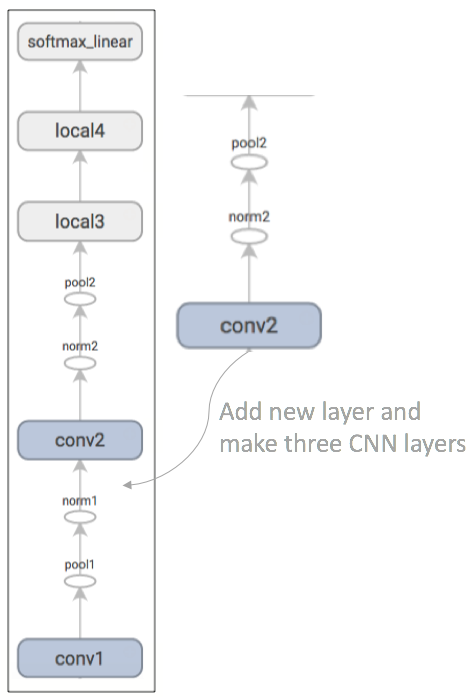

In [8]:
from IPython.display import Image, display
display(Image(filename='pic/inference_graph.png'))

# 4. TensorBoar
TensorBoard provides the comprehensive understanding of the ongoing data flow, including image, rates, weights, bias, .... These information is displayed periodically. To install the TensorBoard throughout the network following steps are necessary.

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/TensorBoard.png)

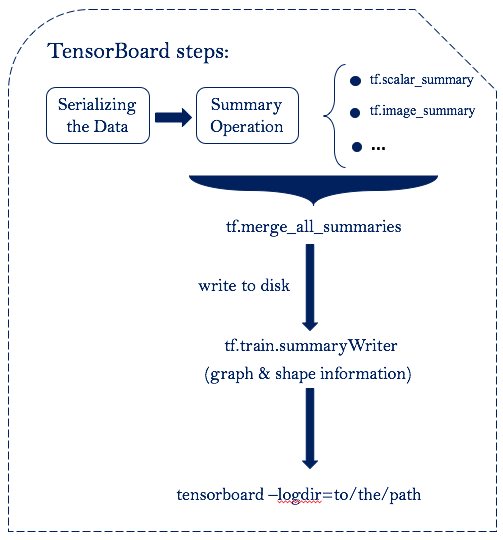

In [9]:
from IPython.display import Image, display
display(Image(filename='pic/TensorBoard.png'))

**Note** Remotely running TensorBoard requires making the tunnel, one of the simplest way is  


$ ssh -N -f -L localhost:destination_Port:localhost:Source_port root@10.241.8.101

The detailes graph of the model is provided by TensorBoard as Follow: (default directory for storing the graph information /tmp/ciraf10_train)

tensorboard --logdir=/tmp/ciraf10_train

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/ciraf10_org.png)

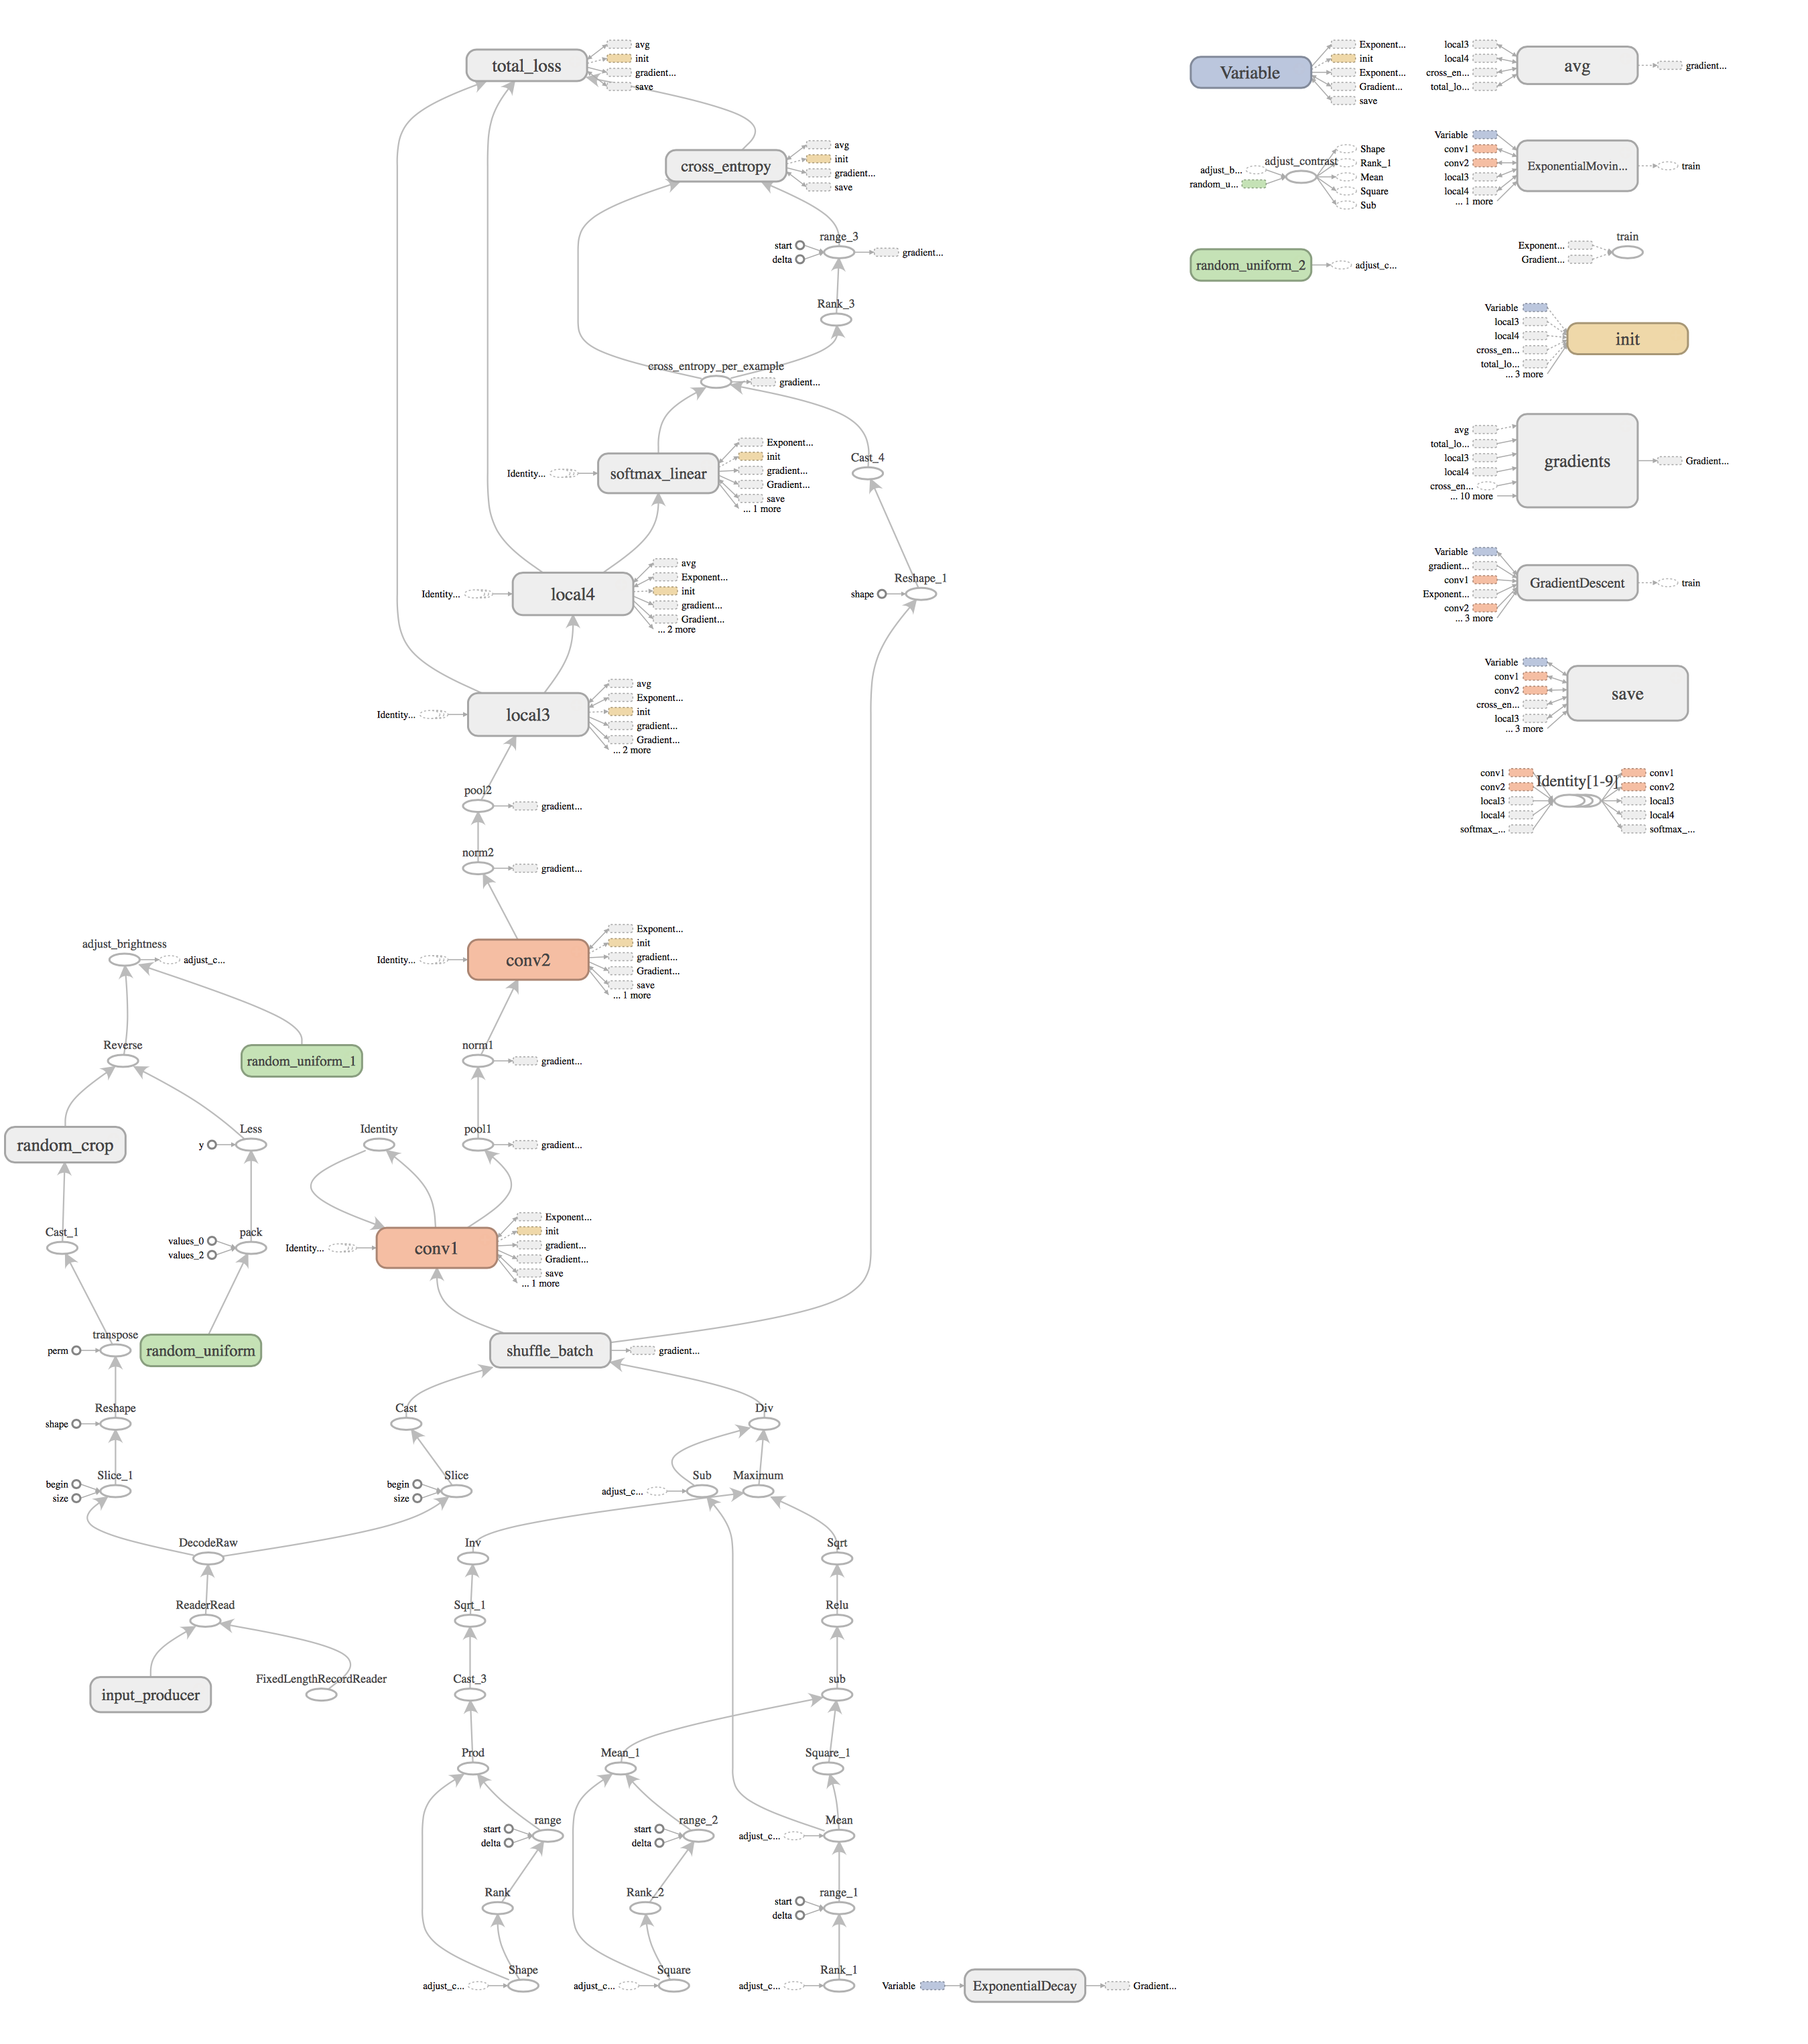

In [10]:
from IPython.display import Image, display
display(Image(filename='pic/ciraf10_org.png'))

# 5. Implimentation

## 5.1. Training
188440 steps has been implimented for 2 days and 15:48:43.  
Multinomial Logistic Regression has been used for this classification problem. 
Gradient Descent Optimizer is used for training the variables.

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/Selection_001.png)

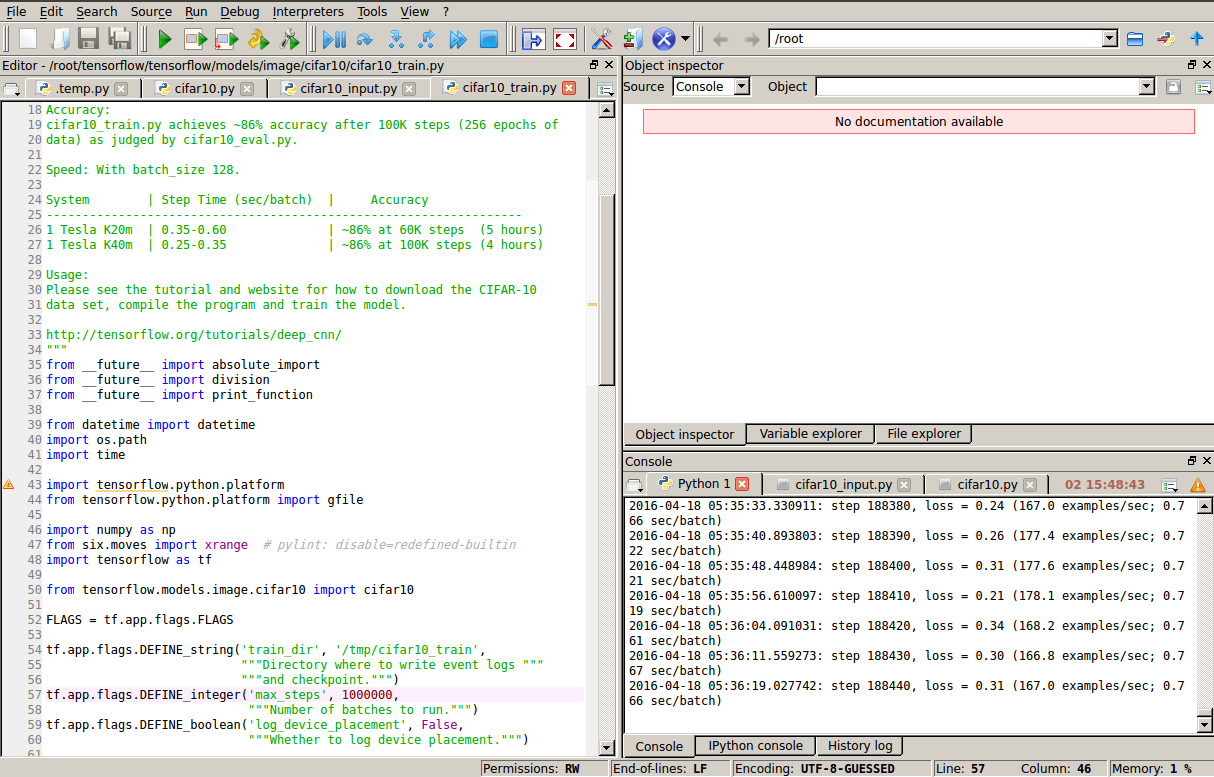

In [16]:
from IPython.display import Image, display
display(Image(filename='/Selection_001.png'))

For monitoring the ongoing situation TesorBoard have been used. For implementing the TensorBoard following chart provides the guidline:

Visualizing TensorBoard with scalar_summary:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/CNN_out.png)

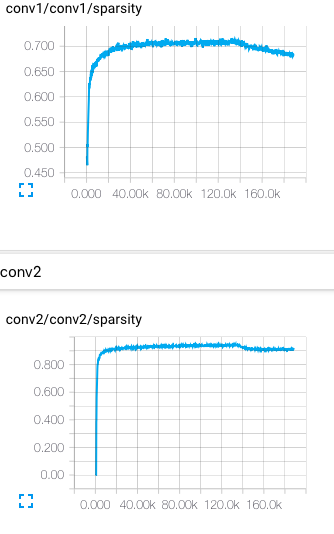

In [18]:
from IPython.display import Image, display
display(Image(filename='pic/CNN_out.png'))

Variation of the Weigths and Bias of the model:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/CNN_w.png)

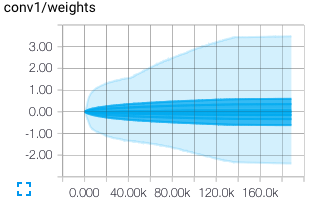

In [19]:
from IPython.display import Image, display
display(Image(filename='pic/CNN_w.png'))

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/CNN1_b.png)

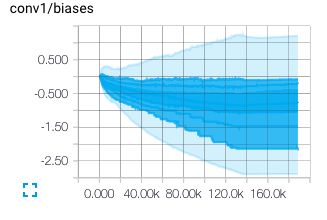

In [20]:
from IPython.display import Image, display
display(Image(filename='pic/CNN1_b.png'))

In [ ]:
The variation of the total loss:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/Total_Loss.png)

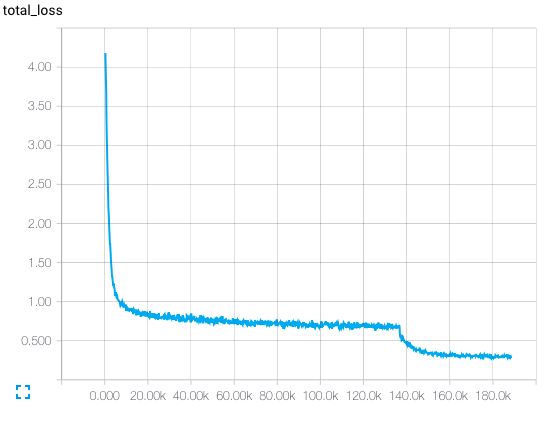

In [21]:
from IPython.display import Image, display
display(Image(filename='pic/Total_Loss.png'))

The Cross etropy of the total loss:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/Cross_In_row.png)

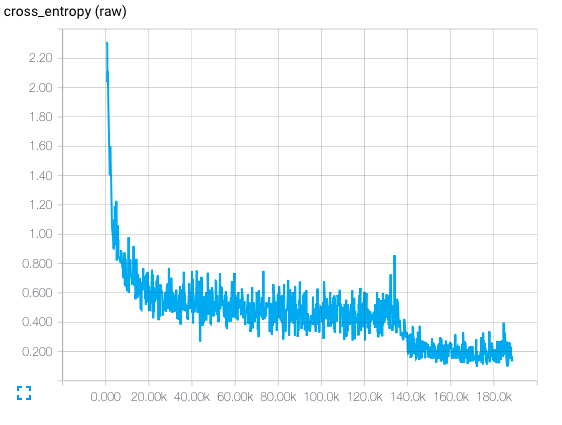

In [22]:
from IPython.display import Image, display
display(Image(filename='pic/Cross_In_row.png'))

Bias Gradiant if the CNN1:

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/con2_b_g.png)

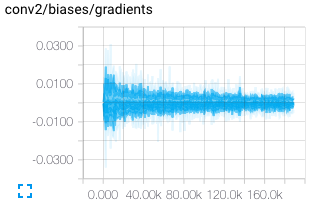

In [23]:
from IPython.display import Image, display
display(Image(filename='pic/con2_b_g.png'))

## 5.2. Evaluation
Here the evaluation of the model has been investigated, The accuaracy is %87.2

![eximage](http://localhost:7777/files/Big-Data-Machine-Learning-Doc/Raw/Ali/pic/eval.png)

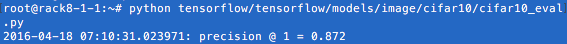

In [24]:
from IPython.display import Image, display
display(Image(filename='pic/eval.png'))